After simulations, we get the results. Now we do an analysis of the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.interpolate import splrep, BSpline

In [2]:
# position4 = r"C:\Users\think\sciebo\Bounded Rationality\Digitalization_SC\Data Value Chain\Cross-border Data Flows\Selected Distributions and Sampling"
position4 = r"C:\Users\think\sciebo\Bounded Rationality\Digitalization_SC\Data Value Chain\Cross-border Data Flows\Selected Distributions and Sampling 2"

### Nash equilibrium

Cleansing the data

In [114]:
# 20230906: order3

## Distribution 002
# res0_0 = pd.read_csv(position4 + '/df_equil_new2_results00_res_0_0.csv')
# res0_0 = pd.read_csv(position4 + '/df_equil_new2_results00_res_10_10.csv')
# res0_0 = pd.read_csv(position4 + '/df_equil_new2_results00_res_0_10.csv')

## Distribution 003
# res0_0 = pd.read_csv(position4 + '/df_equil_new3_results00_res_0_0.csv')
# res0_0 = pd.read_csv(position4 + '/df_equil_new3_results00_res_10_10.csv')
# res0_0 = pd.read_csv(position4 + '/df_equil_1024_res_dist01_1.csv')

# res0_0 = pd.read_csv(position4 + '/df_equil_1024_res_dist01_0_0_1.csv')
# res0_0 = pd.read_csv(position4 + '/df_equil_1024_res_dist01_10_10_1.csv')
res0_0 = pd.read_csv(position4 + '/df_equil_1024_res_dist01_5_5_1.csv')

res0_0 = res0_0[1:] # remove the first row ([0 0 0 ...])

In [115]:
# res0_0_new = res0_0
# res0_0_p2 = res0_0[res0_0['c_0_a'] == res0_0['c_0_b']]
# res0_0_p2

# Dropping duplicates
res0_0_new01 = res0_0[0:441]
res0_0_new02 = res0_0[441:]

In [116]:
res0_0_new01_add = res0_0_new01[res0_0_new01["c_0_a"] < res0_0_new01["c_0_b"]]
res0_0_new03 = pd.concat([res0_0_new01_add, res0_0_new02])

In [117]:
res0_0 = res0_0_new03

In [118]:
# res0_0_new = res0_0_new03

In [119]:
# Two parts: Symmetric and asymmetric investments
res0_0_p1 = res0_0[res0_0['c_0_a'] != res0_0['c_0_b']]
res0_0_p2 = res0_0[res0_0['c_0_a'] == res0_0['c_0_b']]

# Find the other equilibrium prices based on the symmetry
res0_0_p1_re = pd.DataFrame({
                          'c_res_a': res0_0_p1['c_res_b'].tolist(),
                          'c_res_b': res0_0_p1['c_res_a'].tolist(),
                          'c_0_a': res0_0_p1['c_0_b'].tolist(),
                          'c_0_b': res0_0_p1['c_0_a'].tolist(),
                          'price_s_a': res0_0_p1['price_s_b'].tolist(),
                          'price_s_b': res0_0_p1['price_s_a'].tolist(),
                          'm1': res0_0_p1['m2'].tolist(),
                          'm2': res0_0_p1['m1'].tolist(),
                          'pr1': res0_0_p1['pr2'].tolist(),
                          'pr2': res0_0_p1['pr1'].tolist(),
                          'total_pr': res0_0_p1['total_pr'].tolist(),
                          'agg_welfare': res0_0_p1['agg_welfare'].tolist()
                         })

# Combine to a new dataset
res0_0_new = pd.concat([res0_0, res0_0_p1_re], ignore_index=True)
res0_0_new = res0_0_new.drop_duplicates()

In [120]:
res0_0_p1

,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
2,5.0,5.0,0.0,0.5,5.0,5.0,0.0,100.0,0.000,-0.125,-0.125,9137.740689
3,5.0,5.0,0.0,1.0,4.0,5.0,0.0,100.0,0.000,-1.000,-1.000,9216.253968
4,5.0,5.0,0.0,1.5,6.0,8.0,1.0,99.0,1.000,293.625,294.625,8994.793538
5,5.0,5.0,0.0,2.0,6.0,9.0,17.0,83.0,17.000,324.000,341.000,8975.512693
6,5.0,5.0,0.0,2.5,3.0,6.0,0.0,100.0,0.000,84.375,84.375,9351.793804
...,...,...,...,...,...,...,...,...,...,...,...,...
377,5.0,5.0,8.5,9.5,4.0,5.0,0.0,100.0,-614.125,-857.375,-1471.500,10533.979706
378,5.0,5.0,8.5,10.0,6.0,8.0,1.0,99.0,-613.125,-703.000,-1316.125,10312.519276
398,5.0,5.0,9.0,9.5,5.0,5.0,0.0,100.0,-729.000,-857.375,-1586.375,10532.979706
399,5.0,5.0,9.0,10.0,4.0,5.0,0.0,100.0,-729.000,-1000.000,-1729.000,10611.492984


In [121]:
# res0_0_new.to_excel(position4 + '/df_equil_new2_results00_res_0_0_new.xlsx', index=False)
# res0_0_new.to_excel(position4 + '/df_equil_new2_results00_res_10_10_new.xlsx', index=False)
# res0_0_new.to_excel(position4 + '/df_equil_new2_results00_res_0_10_new.xlsx', index=False)

# res0_0_new.to_excel(position4 + '/df_equil_new3_results00_res_0_0_new.xlsx', index=False)
res0_0_new

,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
0,5.0,5.0,0.0,0.5,5.0,5.0,0.0,100.0,0.000,-0.125,-0.125,9137.740689
1,5.0,5.0,0.0,1.0,4.0,5.0,0.0,100.0,0.000,-1.000,-1.000,9216.253968
2,5.0,5.0,0.0,1.5,6.0,8.0,1.0,99.0,1.000,293.625,294.625,8994.793538
3,5.0,5.0,0.0,2.0,6.0,9.0,17.0,83.0,17.000,324.000,341.000,8975.512693
4,5.0,5.0,0.0,2.5,3.0,6.0,0.0,100.0,0.000,84.375,84.375,9351.793804
...,...,...,...,...,...,...,...,...,...,...,...,...
436,5.0,5.0,9.5,8.5,5.0,4.0,100.0,0.0,-857.375,-614.125,-1471.500,10533.979706
437,5.0,5.0,10.0,8.5,8.0,6.0,99.0,1.0,-703.000,-613.125,-1316.125,10312.519276
438,5.0,5.0,9.5,9.0,5.0,5.0,100.0,0.0,-857.375,-729.000,-1586.375,10532.979706
439,5.0,5.0,10.0,9.0,5.0,4.0,100.0,0.0,-1000.000,-729.000,-1729.000,10611.492984


In [34]:
# res0_0_new[res0_0_new["c_0_a"]==0]

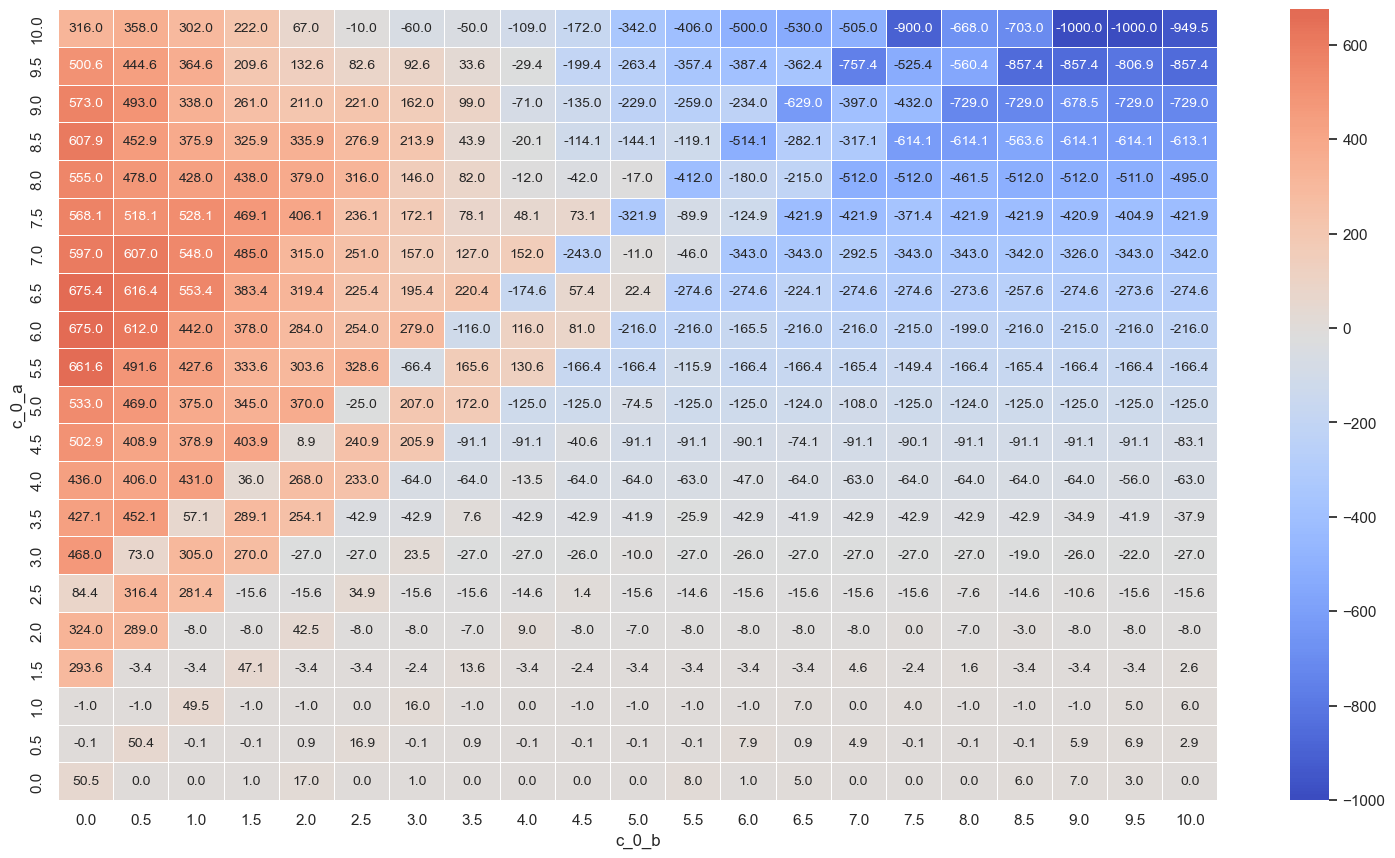

In [103]:
dset_an02 = res0_0_new
heatmap01_price_a = dset_an02.pivot("c_0_a", "c_0_b", "pr1") # pr2
sns.set(rc={'figure.figsize':(18.7,10.27),'figure.dpi': 100})
ax = sns.heatmap(heatmap01_price_a, cmap="coolwarm",
                 center=-20, # -80, -20, -500. 80
                 linewidths=.5, annot=True, 
                 annot_kws={'size':10},fmt='.1f') 
ax.invert_yaxis()
plt.show()

In [37]:
# res0_0[res0_0["c_0_a"] == 10]
# res0_0_new = pd.concat([res0_0, res_add1, res_add2], ignore_index=True)
res0_0

,c_res_a,c_res_b,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
1,10.0,10.0,0.0,0.5,10.0,10.0,0.0,100.0,0.000,-0.125,-0.125,8133.357476
2,10.0,10.0,0.0,1.0,9.0,10.0,0.0,100.0,0.000,-1.000,-1.000,8211.870755
3,10.0,10.0,0.0,1.5,11.0,13.0,1.0,99.0,1.000,293.625,294.625,7990.410325
4,10.0,10.0,0.0,2.0,10.0,13.0,17.0,83.0,0.000,241.000,241.000,8071.129481
5,10.0,10.0,0.0,2.5,8.0,11.0,0.0,100.0,0.000,84.375,84.375,8347.410591
...,...,...,...,...,...,...,...,...,...,...,...,...
227,10.0,10.0,8.0,8.0,11.0,11.0,48.0,52.0,-461.480,-462.520,-924.000,9195.056657
228,10.0,10.0,8.5,8.5,11.0,11.0,48.0,52.0,-563.605,-564.645,-1128.250,9272.569936
229,10.0,10.0,9.0,9.0,11.0,11.0,48.0,52.0,-678.480,-679.520,-1358.000,9350.083214
230,10.0,10.0,9.5,9.5,11.0,11.0,48.0,52.0,-806.855,-807.895,-1614.750,9427.596493


In [144]:
# res0_0_new01 = res0_0_new.drop_duplicates()

In [175]:
# res0_0_new01[res0_0_new01["c_0_a"]==0].drop_duplicates()

In [104]:
# Two parts: Symmetric and asymmetric
res0_0_p1 = res0_0[res0_0['c_0_a'] != res0_0['c_0_b']]
res0_0_p2 = res0_0[res0_0['c_0_a'] == res0_0['c_0_b']]
# Find the other equilibrium prices based on the symmetry
res0_0_p1_re = pd.DataFrame({'c_0_a': res0_0_p1['c_0_b'].tolist(),
                          'c_0_b': res0_0_p1['c_0_a'].tolist(),
                          'price_s_a': res0_0_p1['price_s_b'].tolist(),
                          'price_s_b': res0_0_p1['price_s_a'].tolist(),
                          'm1': res0_0_p1['m2'].tolist(),
                          'm2': res0_0_p1['m1'].tolist(),
                          'pr1': res0_0_p1['pr2'].tolist(),
                          'pr2': res0_0_p1['pr1'].tolist(),
                          'total_pr': res0_0_p1['total_pr'].tolist(),
                          'agg_welfare': res0_0_p1['agg_welfare'].tolist()
                         })
# Combine to a new dataset
res0_0_new = pd.concat([res0_0, res0_0_p1_re], ignore_index=True)
res0_0_new = res0_0_new.drop_duplicates()

In [105]:
# res0_0_new = res0_0_new[1:] # for res_10_10
res0_0_new = res0_0
# res0_0_new

In [106]:
# res0_0_new.to_excel(position + '/df_equil_new002_0731_4thorder_res_0_0_r0_new1.xlsx', index=False)
res0_0_new.to_excel(position + '/df_equil_new002_0731_4thorder_res_10_10_r0_new1.xlsx', index=False)
# res0_0_new01.to_excel(position + '/df_equil_new002_0731_4thorder_res_0_10_r0_new2.xlsx', index=False)

NameError: name 'position' is not defined

In [166]:
res0_0_new = res0_0
# res0_0
# res0_0_new.drop_duplicates()
# res0_0_new
# res0_0_new.reset_index()

In [146]:
# for i in range(10):
#     len(res0_0_new[res0_0_new["c_0_a"]==i]) == 21
len(res0_0_new[res0_0_new["c_0_a"]==9])

21

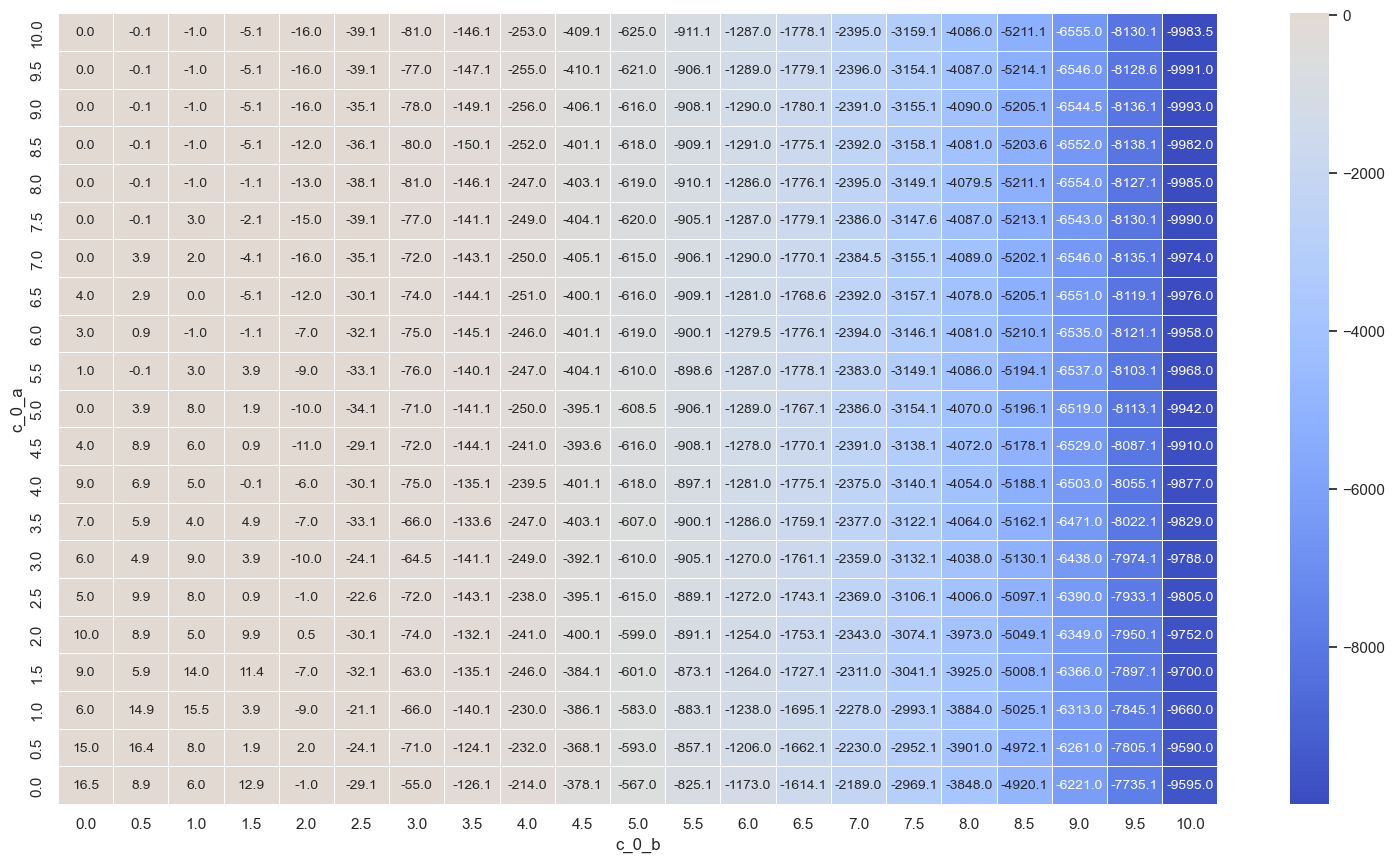

In [201]:
dset_an02 = res0_0_new
heatmap01_price_a = dset_an02.pivot("c_0_a", "c_0_b", "pr2")
sns.set(rc={'figure.figsize':(18.7,10.27),'figure.dpi': 100})
ax = sns.heatmap(heatmap01_price_a, cmap="coolwarm",
                 center=-500, # -80, -20, -500
                 linewidths=.5, annot=True, 
                 annot_kws={'size':10},fmt='.1f') # center value can be adjusted
ax.invert_yaxis()
plt.show()

Splines

In [122]:
# res0_0_new = res0_0
# res0_0

In [123]:
list_values = sorted(res0_0_new[res0_0_new['c_0_b'] == 0.5]["c_0_a"].tolist())

In [124]:
list_values

[0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0]

In [125]:
# Finding the Nash equilibrium

## For Owner b choosing i, what is the best response of a?
br_a_list = []
for i in list_values:
    b_inv_0 = res0_0_new[res0_0_new['c_0_b'] == i]
    max_pr1 = np.max(res0_0_new[res0_0_new['c_0_b'] == i]['pr1'].tolist())
    br_a = list(b_inv_0[b_inv_0['pr1'] == max_pr1]['c_0_a'])
    br_a_list.append(br_a)
nash_a = pd.DataFrame({'c_0_a': br_a_list, 'c_0_b': list_values})

# Build tuples: (c_0_a*, c_0_b) 
tuples01 = []
for i in range(len(list_values)):
    for j in range(len(nash_a['c_0_a'][i])):
        tuples01.append((nash_a['c_0_a'][i][j], nash_a['c_0_b'][i]))
        
## same for finding the best response of b

br_b_list = []
for i in list_values:
    a_inv_0 = res0_0_new[res0_0_new['c_0_a'] == i]
    max_pr2 = np.max(res0_0_new[res0_0_new['c_0_a'] == i]['pr2'].tolist())
    br_b = list(a_inv_0[a_inv_0['pr2'] == max_pr2]['c_0_b'])
    br_b_list.append(br_b)
nash_b = pd.DataFrame({'c_0_b': br_b_list, 'c_0_a': list_values})

# Build tuples: (c_0_a, c_0_b*) 
tuples02 = []
for i in range(len(list_values)):
    for j in range(len(nash_b['c_0_b'][i])):
        tuples02.append((nash_b['c_0_a'][i], nash_b['c_0_b'][i][j]))
        
# Visualize the equilibria
list001 = []
list002 = []
for i in range(len(list_values)):
    list001.append(tuples01[i][0]) 
    list002.append(tuples01[i][1])
list003 = []
list004 = []
for i in range(len(list_values)):
    list003.append(tuples02[i][0]) 
    list004.append(tuples02[i][1])    

[]

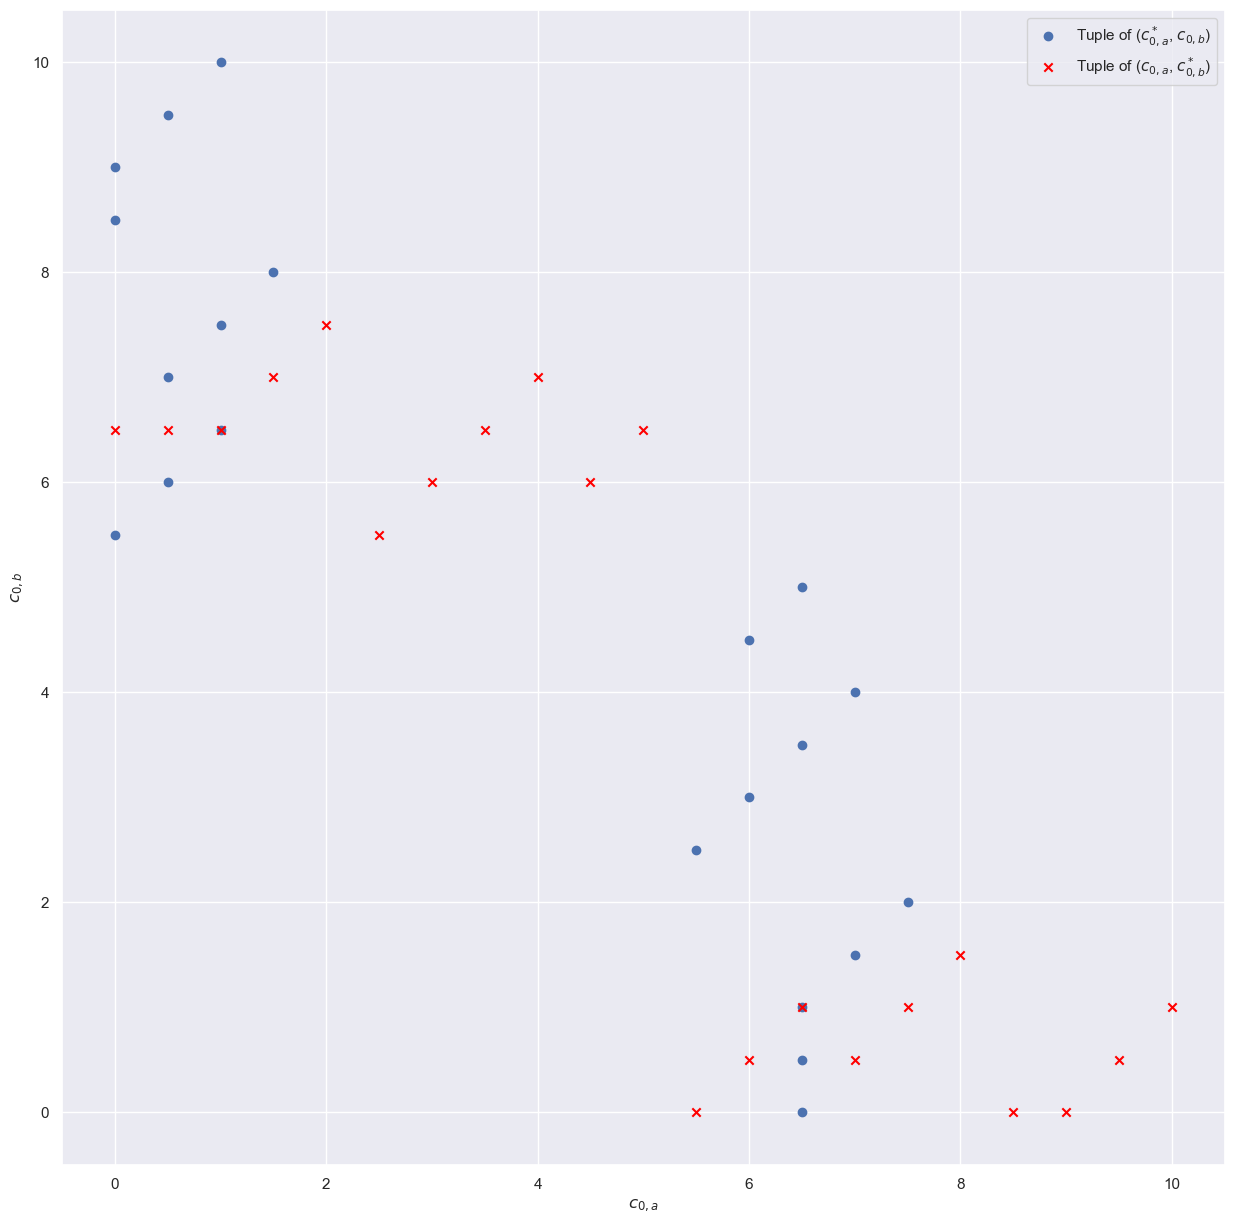

In [126]:
# Find the equilibria
plt.figure(figsize = [15,15])
plt.scatter(list001, list002)
plt.scatter(list003, list004, marker = 'x', color = 'red')
plt.legend(['Tuple of ($c^*_{0,a}$, $c_{0,b}$)', 
            'Tuple of ($c_{0,a}$, $c^*_{0,b}$)'])
plt.xlabel('$c_{0,a}$')
plt.ylabel('$c_{0,b}$')
plt.plot()

In [92]:
# len(np.array(y))
# tck = splrep(x, y, s = basis_param)

Recheck the saved data

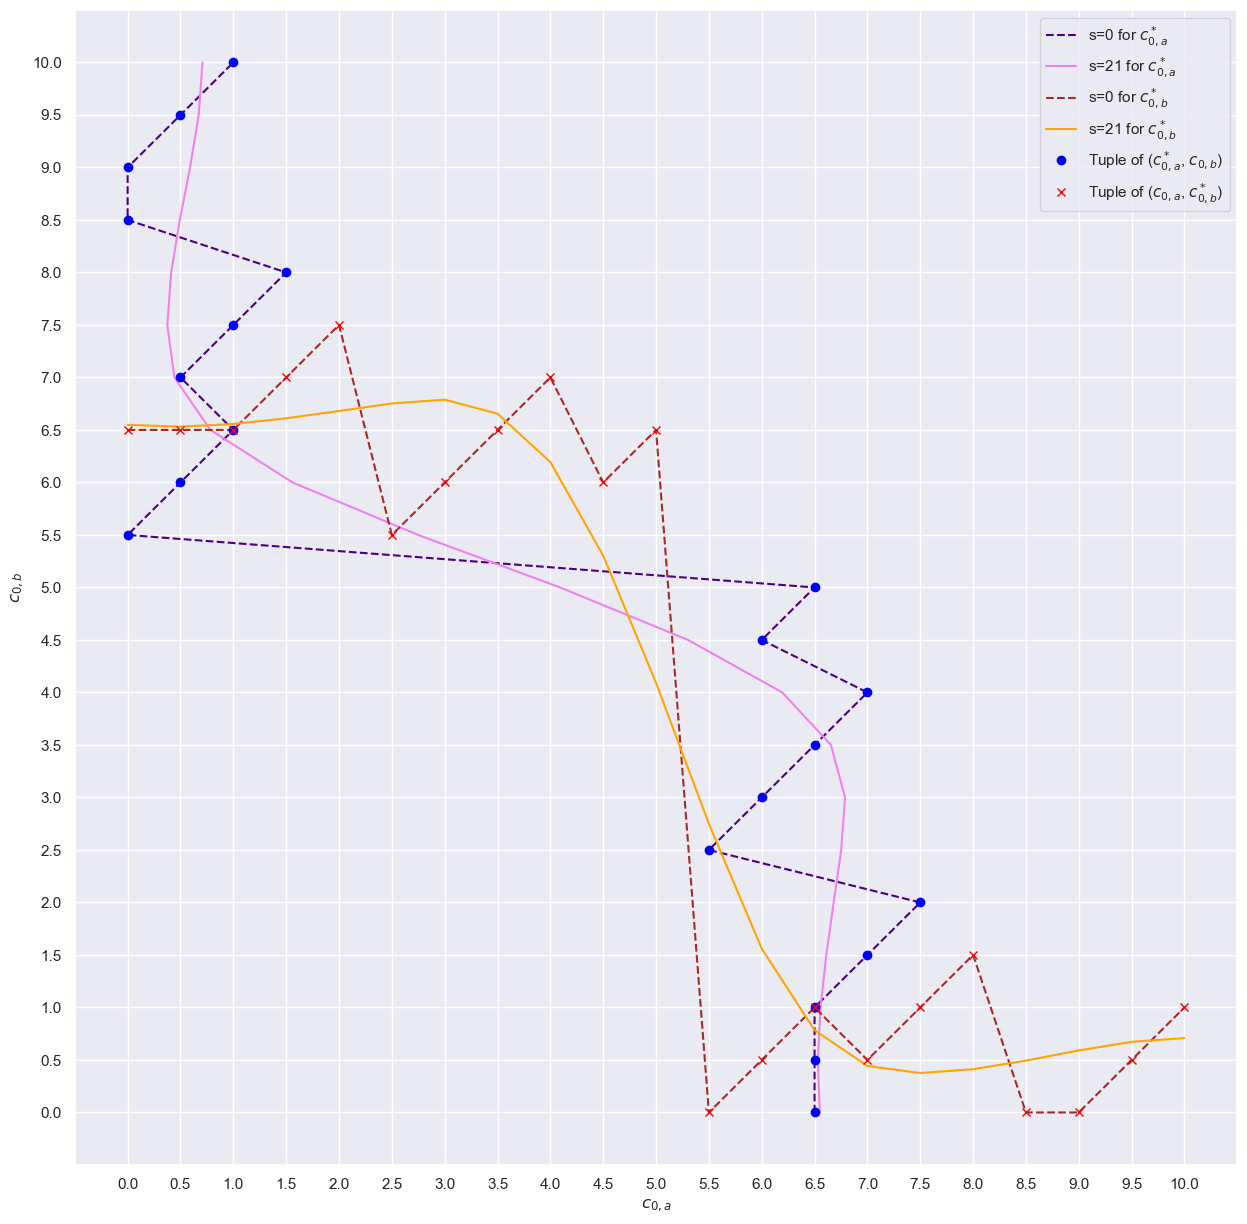

In [128]:
# Draw the splines
x = np.array(list002)
y = np.array(list001)
x1 = np.array(list003)
y1 = np.array(list004)

basis_param = 0 # for the overfitting version: 0, 1, 2 ... 
# (setting all to 0 may generate NaN, since there may be multiple BR for one value)

compare_param = 0 # for comparing different splines: 0, 16, ...

tck = splrep(x, y, s = basis_param)
tck_s = splrep(x, y, s = len(x) - compare_param)
tck_1 = splrep(x1, y1, s = basis_param)
tck_s_1 = splrep(x1, y1, s = len(x) - compare_param)

# Plot
plt.figure(figsize = [15,15])

plt.plot(BSpline(*tck)(x), x, '--', color = "indigo", label=f's={basis_param}' + " for $c^*_{0,a}$")
plt.plot(BSpline(*tck_s)(x), x, '-', color = "violet", label=f's={len(x) - compare_param}' + " for $c^*_{0,a}$")
plt.plot(x1, BSpline(*tck_1)(x1), '--', color = "brown", label=f's={basis_param}' + " for $c^*_{0,b}$")
plt.plot(x1, BSpline(*tck_s_1)(x1), '-', color = "orange", label=f's={len(x1)- compare_param}' + " for $c^*_{0,b}$")

plt.plot(y, x, 'o', color = "blue", label = 'Tuple of ($c^*_{0,a}$, $c_{0,b}$)')
plt.plot(x1, y1, 'x', color = "red", label = 'Tuple of ($c_{0,a}$, $c^*_{0,b}$)')

plt.xticks(np.arange(0, 10.5, 0.5))
plt.yticks(np.arange(0, 10.5, 0.5))

plt.xlabel('$c_{0,a}$')
plt.ylabel('$c_{0,b}$')

plt.legend()
plt.show()

In [227]:
# position4 = r"C:\Users\think\sciebo\Work_NewPC\Files_for_Epoc\Ideas\Main Work\Coding_DVC\Grids_order3_0801" 
# position4 = r"C:\Users\think\sciebo\Work_NewPC\Files_for_Epoc\Ideas\Main Work\Coding_DVC\Grids_order4_0801"

In [237]:
dset01 = pd.read_csv(position4 + "/res0_10_nash.csv")

In [238]:
list001 = dset01["br_a_inv_a"].tolist()
list002 = dset01["br_a_inv_b"].tolist()
list003 = dset01["br_b_inv_a"].tolist()
list004 = dset01["br_b_inv_b"].tolist()

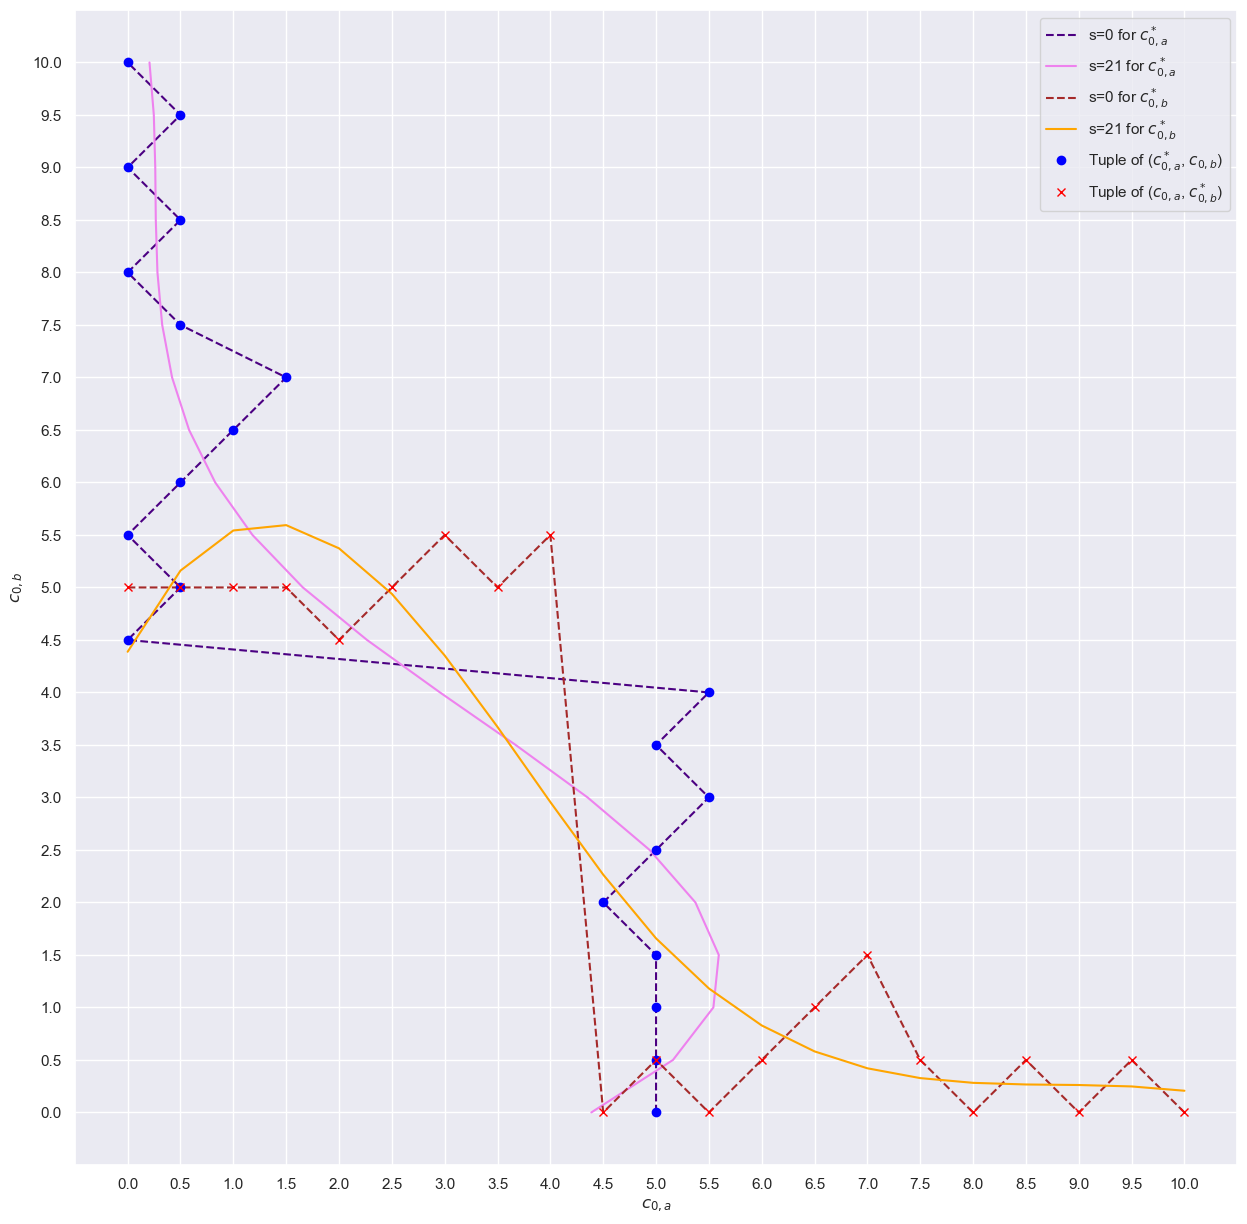

In [27]:
# list003, list004
# Draw the splines
x = np.array(list002)
y = np.array(list001)
x1 = np.array(list003)
y1 = np.array(list004)

basis_param = 0 # for the overfitting version: 0, 1, 2 ... 
# (setting all to 0 may generate NaN, since there may be multiple BR for one value)

compare_param = 0 # for comparing different splines: 0, 16, ...

tck = splrep(x, y, s = basis_param)
tck_s = splrep(x, y, s = len(x) - compare_param)
tck_1 = splrep(x1, y1, s = basis_param)
tck_s_1 = splrep(x1, y1, s = len(x) - compare_param)

# Plot
plt.figure(figsize = [15,15])

plt.plot(BSpline(*tck)(x), x, '--', color = "indigo", label=f's={basis_param}' + " for $c^*_{0,a}$")
plt.plot(BSpline(*tck_s)(x), x, '-', color = "violet", label=f's={len(x) - compare_param}' + " for $c^*_{0,a}$")
plt.plot(x1, BSpline(*tck_1)(x1), '--', color = "brown", label=f's={basis_param}' + " for $c^*_{0,b}$")
plt.plot(x1, BSpline(*tck_s_1)(x1), '-', color = "orange", label=f's={len(x1)- compare_param}' + " for $c^*_{0,b}$")

plt.plot(y, x, 'o', color = "blue", label = 'Tuple of ($c^*_{0,a}$, $c_{0,b}$)')
plt.plot(x1, y1, 'x', color = "red", label = 'Tuple of ($c_{0,a}$, $c^*_{0,b}$)')

plt.xticks(np.arange(0, 10.5, 0.5))
plt.yticks(np.arange(0, 10.5, 0.5))

plt.xlabel('$c_{0,a}$')
plt.ylabel('$c_{0,b}$')

plt.legend()
plt.show()

In [159]:
# plt.plot(BSpline(*tck)(x), x, '--', color = "indigo", label='s=0 for $c^*_{0,a}$')

In [211]:
# Save the data for later use
table_0 = pd.DataFrame({"br_a_inv_a":list001, "br_a_inv_b":list002, "br_b_inv_a":list003, "br_b_inv_b":list004})
table_0

,br_a_inv_a,br_a_inv_b,br_b_inv_a,br_b_inv_b
0,3.5,0.0,0.0,0.0
1,3.5,0.5,0.5,0.5
2,3.0,1.0,1.0,1.0
3,3.5,1.5,1.5,1.0
4,3.0,2.0,2.0,0.0
5,2.5,2.5,2.5,0.5
6,3.0,3.0,3.0,1.0
7,3.5,3.5,3.5,0.0
8,4.0,4.0,4.0,0.0
9,3.5,4.5,4.5,0.5


In [212]:
# table_0.to_csv(r"C:\Users\think\sciebo\Work_NewPC\Files_for_Epoc\Ideas\Main Work\Coding_DVC\Grids_order3_0801" + "/res0_10_nash.csv",
#               index = False)
table_0.to_csv(r"C:\Users\think\sciebo\Work_NewPC\Files_for_Epoc\Ideas\Main Work\Coding_DVC\Grids_order4_0801" + "/res0_10_nash.csv",
              index = False)

In [23]:
position

'C:\\Users\\think\\Downloads\\New_data_DVC230731'

In [77]:
tuples01

[(7, 0),
 (7, 1),
 (7, 2),
 (6, 3),
 (7, 4),
 (0, 5),
 (1, 6),
 (0, 7),
 (1, 8),
 (0, 9),
 (0, 10),
 (1, 10),
 (0, 11),
 (1, 12),
 (0, 13),
 (1, 14),
 (2, 15)]

In [78]:
nash_a

,c_0_a,c_0_b
0,[7],0
1,[7],1
2,[7],2
3,[6],3
4,[7],4
5,[0],5
6,[1],6
7,[0],7
8,[1],8
9,[0],9


In [15]:
res0_0 = pd.read_excel(position0 + '/230710_data_^3/df_equil_new002_0710_res_0_0_new.xlsx')
# Two parts: Symmetric and asymmetric
res0_0_p1 = res0_0[res0_0['c_0_a'] != res0_0['c_0_b']]
res0_0_p2 = res0_0[res0_0['c_0_a'] == res0_0['c_0_b']]
# Find the other equilibrium prices based on the symmetry
res0_0_p1_re = pd.DataFrame({'c_0_a': res0_0_p1['c_0_b'].tolist(),
                          'c_0_b': res0_0_p1['c_0_a'].tolist(),
                          'price_s_a': res0_0_p1['price_s_b'].tolist(),
                          'price_s_b': res0_0_p1['price_s_a'].tolist(),
                          'm1': res0_0_p1['m2'].tolist(),
                          'm2': res0_0_p1['m1'].tolist(),
                          'pr1': res0_0_p1['pr2'].tolist(),
                          'pr2': res0_0_p1['pr1'].tolist(),
                          'total_pr': res0_0_p1['total_pr'].tolist(),
                          'agg_welfare': res0_0_p1['agg_welfare'].tolist()
                         })
# Combine to a new dataset
res0_0_new = pd.concat([res0_0, res0_0_p1_re], ignore_index=True)
res0_0_new = res0_0_new.drop_duplicates()

In [23]:
res0_0 = pd.read_excel(position0 + '/230710_data_^3/df_equil_new002_0710_res_10_10_new.xlsx')
# Two parts: Symmetric and asymmetric
res0_0_p1 = res0_0[res0_0['c_0_a'] != res0_0['c_0_b']]
res0_0_p2 = res0_0[res0_0['c_0_a'] == res0_0['c_0_b']]
# Find the other equilibrium prices based on the symmetry
res0_0_p1_re = pd.DataFrame({'c_0_a': res0_0_p1['c_0_b'].tolist(),
                          'c_0_b': res0_0_p1['c_0_a'].tolist(),
                          'price_s_a': res0_0_p1['price_s_b'].tolist(),
                          'price_s_b': res0_0_p1['price_s_a'].tolist(),
                          'm1': res0_0_p1['m2'].tolist(),
                          'm2': res0_0_p1['m1'].tolist(),
                          'pr1': res0_0_p1['pr2'].tolist(),
                          'pr2': res0_0_p1['pr1'].tolist(),
                          'total_pr': res0_0_p1['total_pr'].tolist(),
                          'agg_welfare': res0_0_p1['agg_welfare'].tolist()
                         })
# Combine to a new dataset
res0_0_new = pd.concat([res0_0, res0_0_p1_re], ignore_index=True)
res0_0_new = res0_0_new.drop_duplicates()

In [24]:
res0_0_new

,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
0,0,0,10.0,10.0,45,55,0.0,0.0,0,8054.844198
1,0,1,9.0,10.0,0,100,0.0,-1.0,-1,8211.870755
2,0,2,10.0,13.0,17,83,0.0,241.0,241,8071.129481
3,0,3,10.0,14.0,1,99,0.0,369.0,369,8125.976453
4,0,4,10.0,15.0,0,100,0.0,436.0,436,8182.950427
...,...,...,...,...,...,...,...,...,...,...
251,14,12,13.0,10.0,83,17,-2495.0,-1728.0,-4223,9931.448170
252,15,12,14.0,10.0,99,1,-2979.0,-1728.0,-4707,9986.295142
253,14,13,10.0,9.0,100,0,-2744.0,-2197.0,-4941,10227.216001
254,15,13,13.0,10.0,83,17,-3126.0,-2197.0,-5323,10086.474727


,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
0,0.0,0.0,1.0,1.0,45.0,55.0,45.0,55.0,100.0,9963.610623
1,0.0,1.0,1.0,2.0,0.0,100.0,0.0,199.0,199.0,10020.637180
2,0.0,2.0,1.0,4.0,17.0,83.0,17.0,324.0,341.0,9979.895906
3,0.0,3.0,1.0,5.0,1.0,99.0,1.0,468.0,469.0,10034.742879
4,0.0,4.0,1.0,6.0,0.0,100.0,0.0,536.0,536.0,10091.716853
...,...,...,...,...,...,...,...,...,...,...
237,14.0,12.0,4.0,1.0,83.0,17.0,-2412.0,-1711.0,-4123.0,11840.214595
238,15.0,12.0,5.0,1.0,99.0,1.0,-2880.0,-1727.0,-4607.0,11895.061568
239,14.0,13.0,2.0,1.0,100.0,0.0,-2544.0,-2197.0,-4741.0,12035.982427
240,15.0,13.0,4.0,1.0,83.0,17.0,-3043.0,-2180.0,-5223.0,11995.241152


In [22]:
res0_0_new[res0_0_new['c_0_a']==1]

,c_0_a,c_0_b,price_s_a,price_s_b,m1,m2,pr1,pr2,total_pr,agg_welfare
16,1.0,1.0,1.0,1.0,45.0,55.0,44.0,54.0,98.0,10118.637180
17,1.0,2.0,1.0,2.0,0.0,100.0,-1.0,192.0,191.0,10175.663738
18,1.0,3.0,1.0,4.0,17.0,83.0,16.0,305.0,321.0,10134.922463
19,1.0,4.0,1.0,5.0,1.0,99.0,0.0,431.0,431.0,10189.769436
20,1.0,5.0,1.0,6.0,0.0,100.0,-1.0,475.0,474.0,10246.743410
21,1.0,6.0,1.0,8.0,6.0,94.0,5.0,536.0,541.0,10204.905482
22,1.0,7.0,1.0,9.0,1.0,99.0,0.0,548.0,548.0,10260.901692
129,1.0,0.0,2.0,1.0,100.0,0.0,199.0,0.0,199.0,10020.637180
